# QFT Calculator (For Arbitrary Basis State)

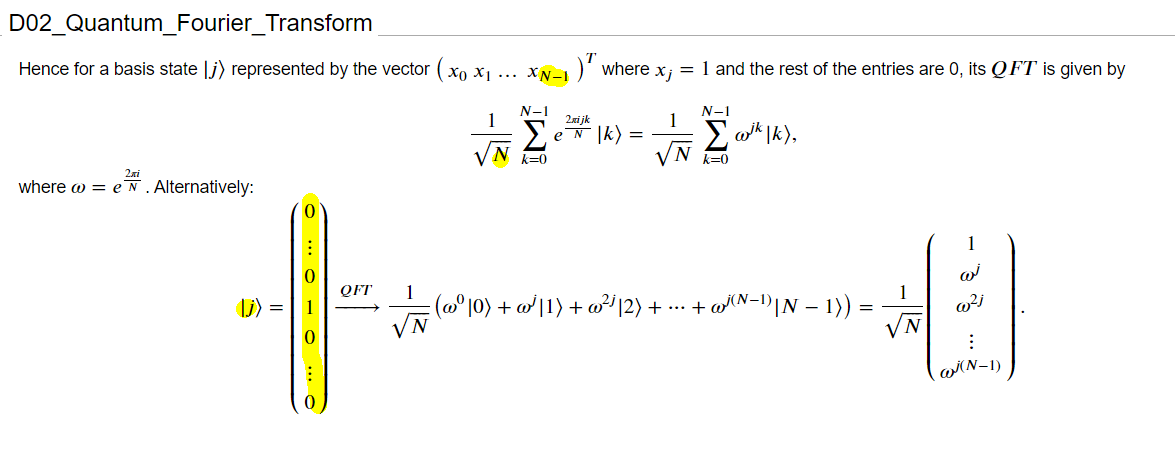

In [74]:
import numpy as np 
import math, cmath 


In [205]:
def qft_of_basis(state_label): 
    import numpy as np
    import math, cmath
    MAX_QUBITS      = 10
    MAX_STATE_LABEL = 2 ** MAX_QUBITS  # 1024 
    
    
    if (state_label < 0): return "Error Negative Number"
    if (state_label >= MAX_STATE_LABEL): return "Error MAX_QUBIT reached"
    
    num_qb = 0
    N = 0
    j_ket = None
    
    if state_label == 0:
        num_qb = 1
        N = 1
        j_ket = np.zeros(N).astype(int)
        j_ket[0] = 1
    
    elif state_label == 1:
        num_qb = 1
        N = 1
        j_ket = np.zeros(N).astype(int)
        j_ket[0] = 1

    else: 
        # WRONG !!!!! https://math.stackexchange.com/questions/160295/how-many-bits-needed-to-store-a-number
        # num_qb = int(np.ceil(np.log(state_label) / np.log(2))) 
        num_qb = int( np.floor( np.log2(state_label) ) + 1 )
        N = 2**num_qb
        j_ket = np.zeros(N).astype(int) # 8,16,32,64...,1024
        j_ket[state_label] = 1
    

    print("State Label for input is: ",state_label)    
    print("Number of Qubits required to represent input number: ",num_qb)
    print("Number of Entries in Statevector : ",N)
    print("Ket form of the input number:\n",j_ket)
    
    ## ------- QFT ----
    omega = cmath.exp(2*cmath.pi*1j/N)
    reciprocal_root_N = 1.0/cmath.sqrt(N)
    
    qft = []
    
    for i in range(N):
        val = reciprocal_root_N * omega**(i*state_label)
        qft.append(val)
    
    return np.array(qft)
    
    

In [223]:
# Input any number between 0 to 2^10 (1024) 
input_number = 34 # 34
print("Input number is: ",input_number)

qft = qft_of_basis(input_number)

print("QFT of the state label ",input_number," is \n",qft)

Input number is:  34
State Label for input is:  34
Number of Qubits required to represent input number:  6
Number of Entries in Statevector :  64
Ket form of the input number:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
QFT of the state label  34  is 
 [ 1.25000000e-01+0.00000000e+00j -1.22598160e-01-2.43862903e-02j
  1.15484942e-01+4.78354290e-02j -1.03933702e-01-6.94462791e-02j
  8.83883476e-02+8.83883476e-02j -6.94462791e-02-1.03933702e-01j
  4.78354290e-02+1.15484942e-01j -2.43862903e-02-1.22598160e-01j
 -9.19258825e-17+1.25000000e-01j  2.43862903e-02-1.22598160e-01j
 -4.78354290e-02+1.15484942e-01j  6.94462791e-02-1.03933702e-01j
 -8.83883476e-02+8.83883476e-02j  1.03933702e-01-6.94462791e-02j
 -1.15484942e-01+4.78354290e-02j  1.22598160e-01-2.43862903e-02j
 -1.25000000e-01-1.83851765e-16j  1.22598160e-01+2.43862903e-02j
 -1.15484942e-01-4.78354290e-02j  1.03933702e-01+6.94462791e-02j
 -8.83883

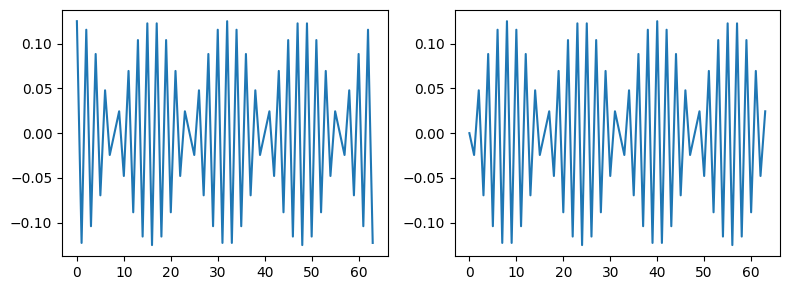

In [224]:
import numpy as np 
import math, cmath
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axes[0].plot(qft.real)
axes[1].plot(qft.imag)
fig.tight_layout()